# Basic data set simulation and test for SGD

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Simulate and Visualize data

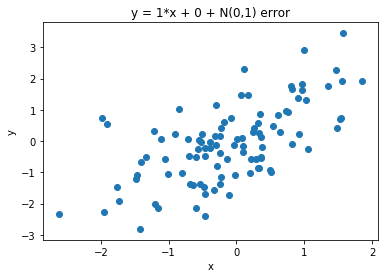

In [3]:
np.random.seed(42)

x = np.random.normal(size=[100,1])
x = np.hstack( (np.ones(x.shape), x) )

y = np.array([x[:,1]]).T + np.random.normal(size=[100,1])

plt.scatter(x=x[:,1], y=y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = 1*x + 0 + N(0,1) error')
plt.show()

## Regression using analytical solution 

In [4]:
from myalgorithm.ridge_regression import RidgeRegression
rr = RidgeRegression(penalty=0)
rr.fit(X=x, y=y)
print(rr.beta)

[[0.00742783]
 [0.85674284]]


## Regression using GD

In [50]:
rr_gd = RidgeRegression(penalty=0, opt='gradient_descent', lr=3e-2, n_epochs=100)
rr_gd.fit(X=x, y=y)
print(rr_gd.beta)

[[-0.00824021]
 [ 0.82397521]]


## GD - betas changing at each iteration

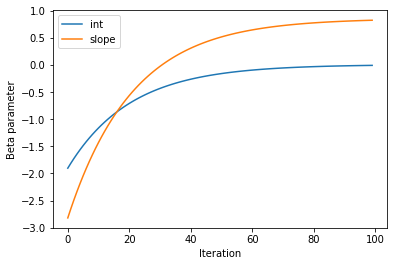

In [51]:
plt.plot(rr_gd.beta_history[0])
plt.plot(rr_gd.beta_history[1])

plt.xlabel('Iteration')
plt.ylabel('Beta parameter')
plt.legend(['int','slope'])
plt.show()

## Cost function and beta search

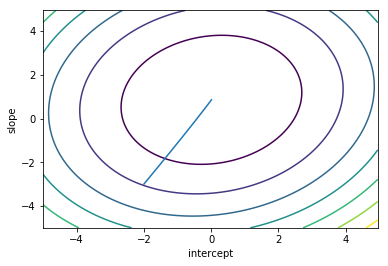

In [26]:
from myalgorithm.ridge_regression import calc_cost, calc_grad

fig = plt.figure()

xx = yy = np.arange(-5.0, 5.0, 0.05)
X, Y = np.meshgrid(xx, yy)
zs = np.array([calc_cost(x,y, np.array([[intcpt,slope]]).T ) for intcpt, slope in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

plt.contour(X,Y,Z)
plt.xlabel('intercept')
plt.ylabel('slope')

ints = rr_gd.beta_history[0]
slopes = rr_gd.beta_history[1]

plt.plot(ints, slopes)

plt.show()

## SGD

In [37]:
from myalgorithm.ridge_regression import RidgeRegression
rr_sgd = RidgeRegression(penalty=0, opt='sgd', lr=1e-1, n_epochs=300)
rr_sgd.fit(X=x, y=y)
print(rr_sgd.beta)

[[0.00653565]
 [0.85816967]]


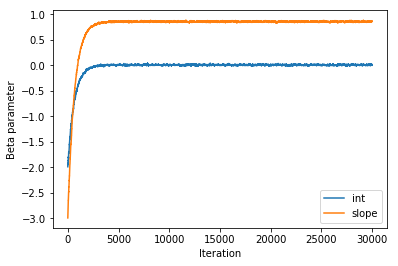

In [38]:
plt.plot(rr_sgd.beta_history[0])
plt.plot(rr_sgd.beta_history[1])

plt.xlabel('Iteration')
plt.ylabel('Beta parameter')
plt.legend(['int','slope'])
plt.show()

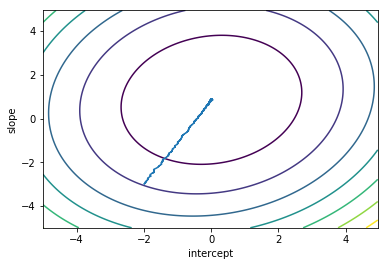

In [39]:
from myalgorithm.ridge_regression import calc_cost, calc_grad

fig = plt.figure()

xx = yy = np.arange(-5.0, 5.0, 0.05)
X, Y = np.meshgrid(xx, yy)
zs = np.array([calc_cost(x,y, np.array([[intcpt,slope]]).T ) for intcpt, slope in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

plt.contour(X,Y,Z)
plt.xlabel('intercept')
plt.ylabel('slope')

ints = rr_sgd.beta_history[0]
slopes = rr_sgd.beta_history[1]

plt.plot(ints, slopes)

plt.show()

In [16]:
len(rr_sgd.beta_history[0])

3000